k = 9 err = 0.0222222222222
Accuracy: 15  /  15  =  100.0 %


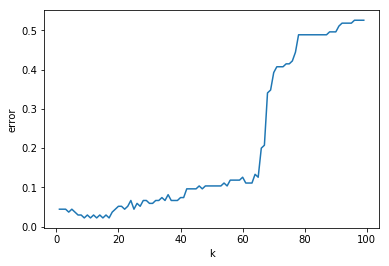

In [29]:
import numpy as np
import math
import Queue as Q
from collections import Counter
import matplotlib.pyplot as plt 

def read_data(): 
    x = [] 
    with open('iris.data', 'r') as f: 
        for line in f: 
            if line == '\n': 
                continue 
            a, b, c, d, e = line.split(',') 
            if e == 'Iris-setosa\n': 
                e = 1
            elif e == 'Iris-versicolor\n': 
                e = 2
            else: 
                e = 3
            x.append([float(a), float(b), float(c), float(d), float(e)]) 
    return x


def model_kfold(k_values, trainingX, ty,k):
    minL = 1000000
    goodK = 1
    l_values = []
    for k_value in k_values:
        L = k_fold(k,trainingX,ty,k_value)
        l_values.append(L)
        if(L<minL):
            minL = L
            goodK = k_value
    return goodK,minL, l_values
    
def k_fold(k,x,y,k_value):
    mk = x.shape[0]/k
    error = 0
    for i in xrange(k):
        validationX = x[i*mk:(i+1)*mk,:]
        validationY = y[i*mk:(i+1)*mk,:]
        trainX = np.concatenate((x[:i*mk,:], x[(i+1)*mk:,:]),axis = 0)
        trainY = np.concatenate((y[:i*mk,:], y[(i+1)*mk:,:]),axis = 0)
        count = 0
        for i in xrange(validationX.shape[0]):
            y_res = knn(k_value,trainX,trainY,validationX[i]) 
            if y_res==validationY[i][0]:
                count+=1
        ls = 1-float(count)/validationX.shape[0]
        error += ls
    return error/k

def calc_dist(x1,x2):
    dist = 0
    for i in xrange(len(x1)):
        d = x1[i]-x2[i]
        dist += d*d
    return math.sqrt(dist)

def knn( k, trainX, trainY, sampleX):
    qsize = 0
    neighbours = []
    for i in xrange(trainX.shape[0]):
        dist = calc_dist(trainX[i],sampleX)
        neighbours.append((dist,trainY[i][0]))
    neighbours.sort()
    meighbours = neighbours[0:k]
    cnt = Counter()
    for i in xrange(k):
        cur = neighbours[i]
        cnt[cur[1]]+=1
    return cnt.most_common(1)[0][0]
        
def validate(k,trainingX,trainingY,validationX,validationY):
    count = 0
    for i in xrange(validationX.shape[0]):
        y_res = knn(k,trainingX,trainingY,validationX[i])
        if y_res == validationY[i][0]:
            count+=1
    print "Accuracy:", count," / ",validationX.shape[0], " = ", 100 * float(count)/validationX.shape[0],"%"
            
    
x = np.array(read_data())

np.random.shuffle(x)

    
trainingX = x[:9*x.shape[0]/10,:4]
validationX = x[9*x.shape[0]/10:,:4]
trainingY = x[:9*x.shape[0]/10,4:]
validationY = x[9*x.shape[0]/10:,4:]
k_values = [i for i in xrange(1,100)]
k = model_kfold(k_values, trainingX, trainingY,5)
print "k =",k[0],"err =",k[1]
validate(k[0],trainingX,trainingY,validationX,validationY)
plt.plot(k_values,k[2])
plt.xlabel("k")
plt.ylabel("error")
plt.show()


